# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3881395045460631
rmse median 0.4766074928384121


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.10579082576523324
mean error unbiased 0.0432440366072279


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

No handles with labels found to put in legend.


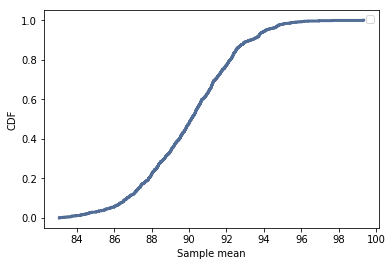

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

90.02831721534146

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.78559484655877, 94.12405276268487)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.5545218192557155

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1827158431793232
rmse Lm 1.919037631829746
mean error L 0.31604402771114537
mean error Lm 0.44667212457357347


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [21]:
def Estimate4(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Simulation with {} iterations'.format(iters))
    print('Mean Error xbar', MeanError(means, mu))
    print('Mean Error median', MeanError(medians, mu))
    
Estimate4(iters=1000)
Estimate4(iters=2000)
Estimate4(iters=10000)

Simulation with 1000 iterations
Mean Error xbar 0.020199325164040518
Mean Error median 0.030013055608606964
Simulation with 2000 iterations
Mean Error xbar -0.004248612730814864
Mean Error median -0.003638985702353202
Simulation with 10000 iterations
Mean Error xbar -0.0029098458877317114
Mean Error median -0.0021661059429615866


In [22]:
def Estimate5(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Simulation with {} iterations'.format(iters))
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))
    
Estimate5(iters=1000)
Estimate5(iters=2000)
Estimate5(iters=10000)

Simulation with 1000 iterations
RMSE biased 0.5196384635816848
RMSE unbiased 0.5716600803351312
Simulation with 2000 iterations
RMSE biased 0.5024285508972604
RMSE unbiased 0.5618314004793035
Simulation with 10000 iterations
RMSE biased 0.5135916537943582
RMSE unbiased 0.5754104916874746


In [33]:
#Both xbar and median's mean error get closer to 0 as the number of iterations increase,
#this suggests that these two estimator are unbiased
#Sn-1 provides consistently prodives a larger RMSE than Sn

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



Simulation with samples of size 5
rmse L 1.8906266955038051
Confidence interval (1.06195606844507, 4.773906154362031)
Simulation with samples of size 10
rmse L 0.8056144747812262
Confidence interval (1.2518072972457357, 3.6473523001290333)
Simulation with samples of size 20
rmse L 0.5225982651035396
Confidence interval (1.4538980446897014, 3.0023594154272297)
Simulation with samples of size 50
rmse L 0.29377540234592114
Confidence interval (1.5935053469335618, 2.54619389838746)
Simulation with samples of size 100
rmse L 0.2077893815452634
Confidence interval (1.7107221726853254, 2.3727397542035122)


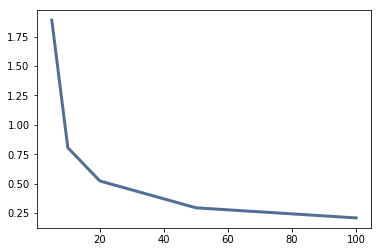

In [28]:
def Estimate6(n=10):
    iters=1000
    lam = 2

    means = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
        
    cdf = thinkstats2.MakeCdfFromList(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    se = RMSE(means, lam)
    
    print('Simulation with samples of size {}'.format(n))
    print('rmse L', se)
    print('Confidence interval', ci)
    
    return se

standard_errors = [Estimate6(n=5), Estimate6(n=10), Estimate6(n=20), Estimate6(n=50), Estimate6(n=100)]
n = [5, 10, 20, 50, 100]
thinkplot.Plot(n, standard_errors)

In [35]:
#As the sample size increase, the standard errors decrease.
#In addition confidence interval focus on the true of Lambda.
#Thus, our estimation get more precise as the sample size increases.

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [30]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [37]:
def SimulateManyGames(lam, nb_game):
    estimates = []
    
    for i in range(nb_game):
        L = SimulateGame(lam)
        estimates.append(L)
    
    return RMSE(estimates, lam), MeanError(estimates, lam)

print('Lambda = 3')
print(SimulateManyGames(3, 10))
print(SimulateManyGames(3, 100))
print(SimulateManyGames(3, 1000))
print(SimulateManyGames(3, 10000))
print('Lambda = 4')
print(SimulateManyGames(4, 10))
print(SimulateManyGames(4, 100))
print(SimulateManyGames(4, 1000))
print(SimulateManyGames(4, 10000))

Lambda = 3
(2.3021728866442674, 0.7)
(1.7663521732655694, -0.04)
(1.731184565550421, -0.021)
(1.7306935026167978, 0.0235)
Lambda = 4
(1.9748417658131499, 0.7)
(2.280350850198276, 0.38)
(1.96596032513375, -0.033)
(2.017523234066959, 0.0386)


In [38]:
#The Mean Error decreases as the number of simulations increases thus it seems to be not a biaised estimator.
#RMSE is quite large, suggesting that the estimation is not so good.